Goal : Credit card fraud detection using ML

Data Description : 
It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.
Content : https://www.kaggle.com/mlg-ulb/creditcardfraud?select=creditcard.csv
The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

Impoerting data and data description

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
data=pd.read_csv("/content/creditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27819 entries, 0 to 27818
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    27819 non-null  int64  
 1   V1      27818 non-null  float64
 2   V2      27818 non-null  float64
 3   V3      27818 non-null  float64
 4   V4      27818 non-null  float64
 5   V5      27818 non-null  float64
 6   V6      27818 non-null  float64
 7   V7      27818 non-null  float64
 8   V8      27818 non-null  float64
 9   V9      27818 non-null  float64
 10  V10     27818 non-null  float64
 11  V11     27818 non-null  float64
 12  V12     27818 non-null  float64
 13  V13     27818 non-null  float64
 14  V14     27818 non-null  float64
 15  V15     27818 non-null  float64
 16  V16     27818 non-null  float64
 17  V17     27818 non-null  float64
 18  V18     27818 non-null  float64
 19  V19     27818 non-null  float64
 20  V20     27818 non-null  float64
 21  V21     27818 non-null  float64
 22

In [8]:
data.shape

(27819, 31)

In [9]:
data.isnull().sum()

Time      0
V1        1
V2        1
V3        1
V4        1
V5        1
V6        1
V7        1
V8        1
V9        1
V10       1
V11       1
V12       1
V13       1
V14       1
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [11]:
data.dropna(inplace=True)
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [12]:
print(data.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [13]:
data["Class"].value_counts()

0.0    27725
1.0       93
Name: Class, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


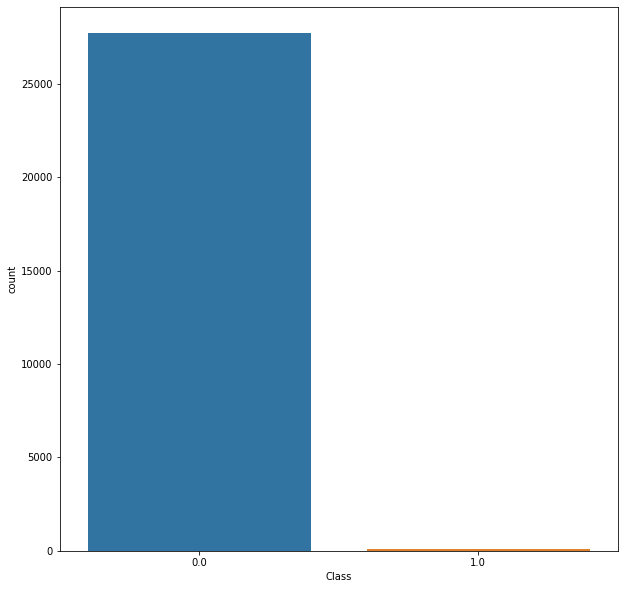

In [17]:
plt.figure(figsize=[10,10])
sns.countplot(data["Class"],data=data)

In [19]:
# Separating Data for Analysis
legit=data[data["Class"]==0]
Fraud=data[data["Class"]==1]

In [21]:
print(legit.shape,Fraud.shape)


(27725, 31) (93, 31)


In [22]:
data.groupby("Class").mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.0,20440.754518,-0.190595,0.129284,0.765200,0.201632,-0.180681,0.092904,-0.099318,0.014884,0.405538,-0.106600,0.521489,-0.710062,0.435830,0.403248,0.046628,0.020468,0.239838,-0.068041,-0.044642,0.041673,-0.037007,-0.125822,-0.040202,0.011510,0.129192,0.022983,0.010650,0.003732,77.232517
1.0,18829.451613,-8.165086,6.134379,-11.690379,6.070066,-5.753486,-2.388962,-7.986805,4.121062,-2.922478,-6.853049,5.750330,-8.602823,0.374935,-8.477588,-0.106986,-4.832378,-7.777151,-2.739827,0.295568,0.697894,0.549621,-0.372248,-0.340859,-0.260055,0.359772,0.179521,0.832824,0.100500,96.609677


Undersampling

In [25]:
Legit=legit.sample(n=93)
Legit.shape

(93, 31)

In [27]:
new_data=pd.concat([Legit,Fraud],axis=0)

In [28]:
new_data.groupby("Class").mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.0,19495.795699,0.111558,0.091127,0.645454,0.354041,-0.255947,0.021047,-0.251596,0.044762,-0.080855,-0.092327,0.708696,-0.973219,0.312967,0.311625,0.111152,-0.097514,0.158737,-0.051374,-0.139943,-0.014017,-0.061538,-0.204232,-0.007693,0.039754,0.119034,-0.005684,0.007892,0.006455,68.520968
1.0,18829.451613,-8.165086,6.134379,-11.690379,6.070066,-5.753486,-2.388962,-7.986805,4.121062,-2.922478,-6.853049,5.750330,-8.602823,0.374935,-8.477588,-0.106986,-4.832378,-7.777151,-2.739827,0.295568,0.697894,0.549621,-0.372248,-0.340859,-0.260055,0.359772,0.179521,0.832824,0.100500,96.609677


In [30]:
#Splitting of data
x=new_data.drop("Class",axis=1)
y=new_data["Class"]

In [31]:
print(x.shape)
print(y.shape)

(186, 30)
(186,)


In [33]:
from sklearn.model_selection import train_test_split

In [34]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,stratify=y,random_state=2)

Model Building

In [35]:
from sklearn.linear_model import LogisticRegression

In [36]:
LR=LogisticRegression()

In [37]:
LR.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [38]:
x_train_prediction=LR.predict(x_train)

In [39]:
from sklearn.metrics import accuracy_score

In [40]:
accuracy_score(y_train,x_train_prediction)

0.9662162162162162

In [41]:
x_test_prediction=LR.predict(x_test)

In [42]:
accuracy_score(y_test,x_test_prediction)

0.8421052631578947